Kelompok 6:
- Muhammad Mahdi (21/473808/PA/20431)
- Delfia Nur Anrianti Putri (21/473882/PA/20438)
- Abid Nujaiba (21/478120/PA/20734)
- Jovinca Claudia Amarissa (21/479037/PA/20778)
- Andyan Yogawardhana (21/482180/PA/21030)
- Ahnaf Bagus Aryandika (22/511232/NPA/19860)


# Importing

In [103]:
## Imports
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

## Seeding 
seed = 42
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test for Scoring

In [107]:
model_unet = keras.models.load_model("/content/drive/MyDrive/- Kuliah Semester 4/CV/Final Project/Kelompok 6 CV_Final Project/Predict/unet (save model) spot the fire 20 epochs.h5")

#classify fire/non fire with cnn
model_classifier = keras.models.load_model("/content/drive/MyDrive/- Kuliah Semester 4/CV/Final Project/Kelompok 6 CV_Final Project/Predict/fire_detection.h5")

In [108]:


def get_prediction(image):
    # 
    image = cv2.resize(image, (128,128))
    

    pred = model_classifier.predict(np.expand_dims(image,axis=0))[0]
    print(np.argmax(pred))
    if (np.argmax(pred) == 1):
        image = image.astype('float32')/255
        result = model_unet.predict(np.expand_dims(image,axis=0))[0]
        result*=255
        result = result > 0.5
    else:
        result = np.zeros((1,128,128,1))
        
    return result

1/1 [==============================] - 0s 249ms/step
1
1/1 [==============================] - 0s 335ms/step


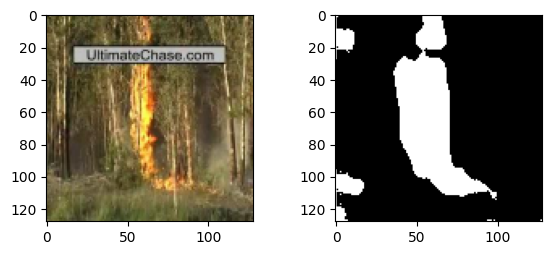

In [109]:
PATH = 'Img_225.jpg'
image = cv2.imread(PATH) 
image = cv2.resize(image, (128,128))
result = get_prediction(image)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(1, 2, 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax.imshow(image)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.reshape(result, (128, 128)), cmap="gray")


In [110]:
image_path = 'AlienatedFluidIndianglassfish-size_restricted.gif'
image = tf.io.read_file(image_path)
image = tf.image.decode_gif(image)
image.shape

TensorShape([31, 394, 700, 3])

In [115]:
with tf.device('/GPU:0'):
  # Load the input image.
  fall_detected = False
  fall = False
  image_path = 'AlienatedFluidIndianglassfish-size_restricted.gif'
  image = tf.io.read_file(image_path)
  image = tf.image.decode_gif(image)

  num_frames, image_height, image_width, _ = image.shape

  output_images = []
  input_size = 128
  
  for frame_idx in range(num_frames):
     
      frame = image[frame_idx, :, :, :].numpy().astype(np.int32)
      y, x, c = frame.shape
      print(frame.shape)
      frame = np.array(frame, dtype='uint8')
      # frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
      img_res = get_prediction(frame)
      img_res = np.array(img_res, dtype='uint8')
      img_res = cv2.resize(img_res, (x,y))
      img_res = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)
      output_images.append(img_res)
      


(394, 700, 3)
1/1 [==============================] - 0s 58ms/step
1
1/1 [==============================] - 0s 101ms/step
(394, 700, 3)
1/1 [==============================] - 0s 58ms/step
1
1/1 [==============================] - 0s 100ms/step
(394, 700, 3)
1/1 [==============================] - 0s 56ms/step
1
1/1 [==============================] - 0s 103ms/step
(394, 700, 3)
1/1 [==============================] - 0s 65ms/step
1
1/1 [==============================] - 0s 96ms/step
(394, 700, 3)
1/1 [==============================] - 0s 57ms/step
1
1/1 [==============================] - 0s 105ms/step
(394, 700, 3)
1/1 [==============================] - 0s 45ms/step
1
1/1 [==============================] - 0s 63ms/step
(394, 700, 3)
1/1 [==============================] - 0s 35ms/step
1
1/1 [==============================] - 0s 63ms/step
(394, 700, 3)
1/1 [==============================] - 0s 40ms/step
1
1/1 [==============================] - 0s 68ms/step
(394, 700, 3)
1/1 [=================

In [117]:
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-wbpg27vk
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-wbpg27vk
  Resolved https://github.com/tensorflow/docs to commit 4223fe22f3bf9bfab22a308dbbf0ef538ecec842
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.5.26.9808-py3-none-any.whl size=183623 sha256=37ca40554a4d4b6356c909be5fe261fe84c7c4717dba05182c58b381fd3df972
  Stored in directory: /tmp/pip-ephem-wheel-cache-rbulpkxr/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs



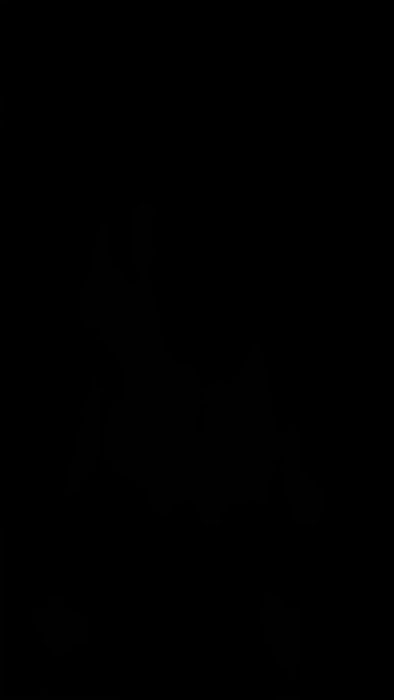

In [119]:
import imageio
from IPython.display import HTML, display
from tensorflow_docs.vis import embed


def to_gif(images, fps):
  """Converts image sequence (4D numpy array) to gif."""
  imageio.mimsave('./animation.gif', images, fps=fps)
  return embed.embed_file('./animation.gif')

output = np.stack(output_images, axis=0)
to_gif(output, fps=15)